In [3]:
!pip3 install numpy-stl


In [4]:
!pip install bpy
!pip install numpy-stl

In [10]:
import bpy
import numpy as np

from PIL import Image
grey_img = Image.open("car2.jpg").convert('L')

max_size=(1000,1000)
max_height=50
min_height=0

grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()

(W,H)=grey_img.size

print(f"W,H={W},{H}")
vertices=[]
edges=[]
faces=[]

DX=1
DY=1

for Y in range(0, H, DY):
    for X in range(0,W,DX):
        pixelIntensity = imageNp[Y][X]
        Z = (pixelIntensity * max_height) / maxPix
        vertices.append((X,Y,Z))


for X in range(0, W-1, DX):
    for Y in range(0, H-1, DY):
        face_v1= X+Y*W
        face_v2=X + 1 + Y* W
        face_v3=X + 1 + (Y+1) * W

        faces.append((face_v1,face_v2,face_v3))

        face_v1= X+Y*W
        face_v2=X  + (Y+1)* W
        face_v3=X + 1 + (Y+1) * W

        faces.append((face_v1,face_v2,face_v3))

new_mesh=bpy.data.meshes.new("new_mesh")
new_mesh.from_pydata(vertices,edges,faces)
new_mesh.update()
# make objec from the mesh
new_object = bpy.data.objects.new("new_object",new_mesh)
view_layer=bpy.context.view_layer
view_layer.active_layer_collection.collection.objects.link(new_object)

W,H=1000,1000


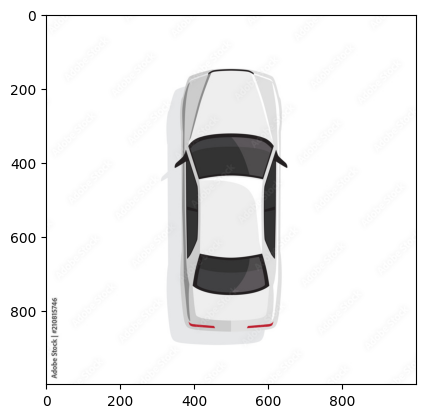

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("car2.jpg")
plt.imshow(im)


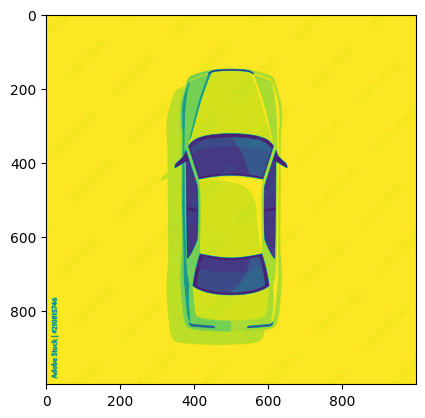

In [16]:
grey_img = Image.open('car2.jpg').convert('L')
plt.imshow(grey_img)

In [17]:
grey_img = Image.open('car2.jpg').convert('L')
from stl import mesh
max_size=(500,500)
max_height=40
min_height=0



grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()

print(imageNp)
(ncols,nrows)=grey_img.size

vertices=np.zeros((nrows,ncols,3))

for x in range(0, ncols):
  for y in range(0, nrows):
    pixelIntensity = imageNp[y][x]
    z = (pixelIntensity * max_height) / maxPix
    #print(imageNp[y][x])
    vertices[y][x]=(x, y, z)

faces=[]

for x in range(0, ncols - 1):
   for y in range(0, nrows - 1):

    vertice1 = vertices[y][x]
    vertice2 = vertices[y+1][x]
    vertice3 = vertices[y+1][x+1]
    face1 = np.array([vertice1,vertice2,vertice3])


    vertice1 = vertices[y][x]
    vertice2 = vertices[y][x+1]
    vertice3 = vertices[y+1][x+1]

    face2 = np.array([vertice1,vertice2,vertice3])

    faces.append(face1)
    faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)

surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]

surface.save('surface.stl')
print(surface)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
number of faces: 498002
<Mesh: '' 498002 vertices>


In [14]:
!ls -alh /content

total 24M
drwxr-xr-x 1 root root 4.0K Mar 17 16:12 .
drwxr-xr-x 1 root root 4.0K Mar 17 16:08 ..
-rw-r--r-- 1 root root  82K Mar 17 16:10 car2.jpg
-rw-r--r-- 1 root root  27K Mar 17 16:10 car.jpg
drwxr-xr-x 4 root root 4.0K Mar 14 13:26 .config
drwxr-xr-x 1 root root 4.0K Mar 14 13:27 sample_data
-rw-r--r-- 1 root root  24M Mar 17 16:16 surface.stl
